In [2]:
import numpy as np
import pandas as pd
#from pygmo import problem
from pyDOE import lhs
from desdeo_problem.testproblems.TestProblems import test_problem_builder
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [3]:
#prob = problem.dtlz(prob_id = 4, k = 2, fdim = 2)
prob = test_problem_builder(name="DTLZ4", n_of_variables=3, n_of_objectives=2)


In [4]:
X = lhs(3, 1000)
Y = prob.evaluate(X).objectives

In [10]:

regr = tree.DecisionTreeRegressor(max_depth=2)

regr = regr.fit(X, Y[:,1])


:54:20,518 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'Droid Sans Hebrew' (DroidSansHebrew-Bold.ttf) normal normal bold normal>) = 10.335
2020-11-19 11:54:20,520 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'MathJax_Size2' (MathJax_Size2-Regular.otf) normal normal regular normal>) = 10.05
2020-11-19 11:54:20,521 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'URW Bookman' (URWBookman-Demi.otf) normal normal book normal>) = 10.05
2020-11-19 11:54:20,523 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-Italic.otf) italic normal 400 normal>) = 11.05
2020-11-19 11:54:20,524 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'esint10' (esint10.ttf) normal normal 400 normal>) = 10.05
2020-11-19 11:54:20,525 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'wasy10' (wasy10.ttf) normal normal 400 normal>) = 10.05
2020-11-19 11:54:20,526 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'FreeS

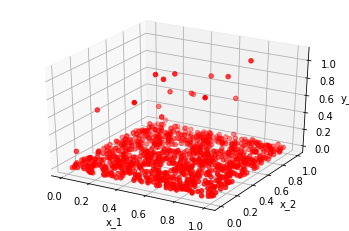

In [5]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1], X[:,2], Y[:,1], c='r', marker='o')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y_1')
plt.show()

In [18]:
import graphviz 

In [19]:
dot_data = tree.export_graphviz(regr, out_file='tree.dot') 

In [10]:
m = RandomForestRegressor(max_depth=2, random_state=0)

In [11]:
m.fit(X, Y[:,1])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [12]:
preds = []
for pred in m.estimators_:
    preds.append(pred.predict(X))

In [13]:
preds=np.asarray(preds)

In [69]:
preds

array([[0.02285697, 0.02285697, 0.00323525, ..., 0.00323525, 0.02285697,
        0.02285697],
       [0.01351266, 0.03957061, 0.00371273, ..., 0.03957061, 0.01351266,
        0.01351266],
       [0.0092333 , 0.03654964, 0.0092333 , ..., 0.03654964, 0.0092333 ,
        0.0092333 ],
       ...,
       [0.01170374, 0.04245063, 0.01170374, ..., 0.00093029, 0.04245063,
        0.00093029],
       [0.02225246, 0.02225246, 0.01073992, ..., 0.01073992, 0.02225246,
        0.02225246],
       [0.00731605, 0.00731605, 0.00731605, ..., 0.00731605, 0.02090055,
        0.00731605]])

In [74]:
np.std(preds,axis=0)

array([0.00823641, 0.01540682, 0.00294657, 0.01521783, 0.01389468,
       0.01317157, 0.01333857, 0.00522196, 0.01217253, 0.00955642,
       0.002847  , 0.01540682, 0.00756566, 0.01454482, 0.01337496,
       0.03914866, 0.01454482, 0.00838004, 0.00294657, 0.00294657,
       0.002847  , 0.002847  , 0.01454482, 0.00522196, 0.00837238,
       0.002847  , 0.00294657, 0.002847  , 0.01337496, 0.01224264,
       0.00522196, 0.002847  , 0.01313542, 0.01318266, 0.00294657,
       0.00294657, 0.002847  , 0.00522196, 0.03914866, 0.03396708,
       0.00294657, 0.00756566, 0.00770366, 0.01389468, 0.00806095,
       0.00756566, 0.01389468, 0.01333857, 0.00955642, 0.00770366,
       0.00294657, 0.002847  , 0.00874147, 0.00806095, 0.00955642,
       0.03846885, 0.00770366, 0.00522196, 0.03240162, 0.01307464,
       0.00294657, 0.01454482, 0.00770366, 0.00294657, 0.01615117,
       0.01615117, 0.00522196, 0.01389468, 0.00294657, 0.00860446,
       0.01454482, 0.01337299, 0.01307464, 0.00294657, 0.00284

In [11]:
regr.get_params(deep=True)

{'criterion': 'mse',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [23]:
regr.apply(X)

array([2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 6, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [8]:
dec_path=regr.decision_path(X)

In [14]:
import collections
samples = collections.defaultdict(list)

for d, dec in enumerate(dec_path):
    for i in range(regr.tree_.node_count):
        if dec.toarray()[0][i] == 1:
            samples[i].append(d)
samples

In [17]:
regr.tree_.impurity

array([9.87516144e-03, 7.42943085e-04, 5.46196731e-05, 6.21147777e-03,
       4.44021336e-02, 3.50321817e-03, 7.69696374e-03])

In [20]:
regr.tree_.value

array([[[0.01526525]],

       [[0.00390319]],

       [[0.00105377]],

       [[0.21695204]],

       [[0.76137384]],

       [[0.55117054]],

       [[0.94530174]]])

In [21]:
regr.tree_.n_node_samples

array([1000,  985,  972,   13,   15,    7,    8])

In [22]:
regr.tree_.feature

array([ 1,  2, -1, -1,  5, -1, -1])

In [7]:
regr.tree_.threshold

NameError: name 'regr' is not defined

In [12]:
n_nodes = regr.tree_.node_count
children_left = regr.tree_.children_left
children_right = regr.tree_.children_right
feature = regr.tree_.feature
threshold = regr.tree_.threshold
rmse = regr.tree_.impurity
rmse_threshold = 0.001
samples_leaf_nodes = regr.apply(X)

# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
error_leaves = None

stack = [(0, -1)]  # seed is the root node id and its parent depth

while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True
        if rmse[node_id] > rmse_threshold:
            if error_leaves is None:
                error_leaves = node_id
            else:
                error_leaves = np.append(error_leaves,node_id)
leaf_error_nodes_dict = {}
for i in error_leaves:
    leaf_error_nodes_dict[str(i)] = np.where(samples_leaf_nodes==i)[0]

In [17]:
is_leaves
error_leaves

array([6, 5, 3])

In [35]:
regr.decision_path(X[0].reshape(1,3))

<1x7 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [15]:
children_left

array([ 1,  2, -1, -1,  5, -1, -1])

In [16]:
leaf_error_nodes_dict

{'6': array([150, 223, 359, 503, 528, 638, 806, 871]),
 '5': array([  2, 271, 301, 482, 491, 521, 884]),
 '3': array([ 52,  79,  85, 147, 461, 473, 481, 504, 586, 881, 887, 937])}

In [ ]:
leaf_error_nodes_data={}
for i in error_leaves:
    

In [93]:
import GPy

dict_gps = {}

for i in error_leaves:
    loc_leaf = np.where(samples_leaf_nodes==i)[0]
    X_leaf = X[loc_leaf]
    Y_leaf = Y[:,1][loc_leaf]
    print(X_leaf)
    print(Y_leaf)
    #kernel = GPy.kern.RBF(input_dim=3, variance=1., lengthscale=1.)
    kernel = GPy.kern.Matern52(2,ARD=True) + GPy.kern.White(2)
    m = GPy.models.GPRegression(X_leaf,Y_leaf.reshape(-1, 1),kernel)
    m.optimize('bfgs')
    #m.optimize_restarts(num_restarts = 10)
    dict_gps[str(i)] = m

2020-11-23 12:41:03,428 - GP - INFO - initializing Y
2020-11-23 12:41:03,429 - GP - INFO - initializing inference method
2020-11-23 12:41:03,431 - GP - INFO - adding kernel and likelihood as parameters
[[0.99542805 0.66370494 0.88515507]
 [0.99349647 0.31392331 0.73021516]
 [0.99474502 0.36995878 0.98267533]
 [0.99836409 0.88382645 0.77463544]
 [0.99287081 0.04264914 0.83664574]
 [0.99638427 0.59901666 0.70473241]
 [0.99730894 0.60467133 0.80041621]
 [0.99960238 0.69614511 0.57238878]]
[0.98461263 0.79372484 1.00003576 1.18850186 0.91879347 0.93416428
 1.02626766 1.04175622]
2020-11-23 12:41:03,710 - GP - INFO - initializing Y
2020-11-23 12:41:03,711 - GP - INFO - initializing inference method
2020-11-23 12:41:03,712 - GP - INFO - adding kernel and likelihood as parameters
[[0.98778226 0.52416457 0.32084308]
 [0.99167226 0.27395486 0.27094479]
 [0.99005306 0.6400042  0.7062205 ]
 [0.98584599 0.47458498 0.8759092 ]
 [0.98627674 0.96586297 0.50759727]
 [0.98870464 0.87089816 0.82415035]


In [98]:
X_test = lhs(3, 1000)
Y_test = prob.evaluate(X_test).objectives

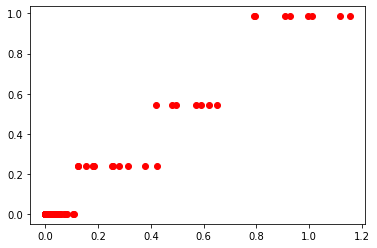

In [99]:
Y_predict = regr.predict(X=X_test)
Y_test_leaf = regr.apply(X_test)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Y_test[:,1], Y_predict, c='r', marker='o')
plt.show()
Y_predict_mod = Y_predict

In [110]:
for i in range(1000):
    if Y_test_leaf[i] in error_leaves: 
        Y_predict_mod[i] = dict_gps[str(Y_test_leaf[i])].predict(X_test[i].reshape(1,-1))[0][0]



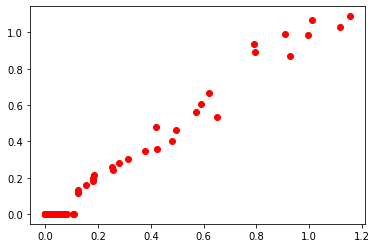

In [111]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Y_test[:,1], Y_predict_mod, c='r', marker='o')
plt.show()

In [102]:
kernel = GPy.kern.Matern52(2,ARD=True) + GPy.kern.White(2)
gp_full = GPy.models.GPRegression(X,Y[:,1].reshape(-1, 1),kernel)
gp_full.optimize('bfgs')



2020-11-23 12:43:47,854 - GP - INFO - initializing Y
2020-11-23 12:43:47,855 - GP - INFO - initializing inference method
2020-11-23 12:43:47,856 - GP - INFO - adding kernel and likelihood as parameters


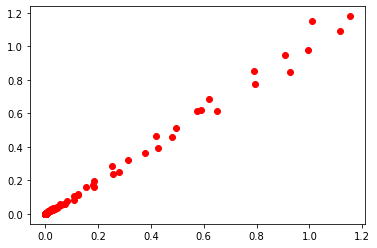

In [120]:
Y_predict_gp_full = gp_full.predict(X_test)[0]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(Y_test[:,1], Y_predict_gp_full, c='r', marker='o')
plt.show()

In [114]:
kernel = GPy.kern.Matern52(2,ARD=True) + GPy.kern.White(2)
z_samples = 50
Z = np.random.rand(z_samples,np.shape(X)[1])
gp_sparse = GPy.models.SparseGPRegression(X,Y[:,1].reshape(-1, 1),Z=Z,kernel=kernel)
gp_sparse.inducing_inputs.fix()
gp_sparse.optimize('bfgs')

2020-11-24 22:31:25,724 - GP - INFO - initializing Y
2020-11-24 22:31:25,726 - GP - INFO - initializing inference method
2020-11-24 22:31:25,728 - GP - INFO - adding kernel and likelihood as parameters
2020-11-24 22:31:25,731 - sparse gp - INFO - Adding Z as parameter


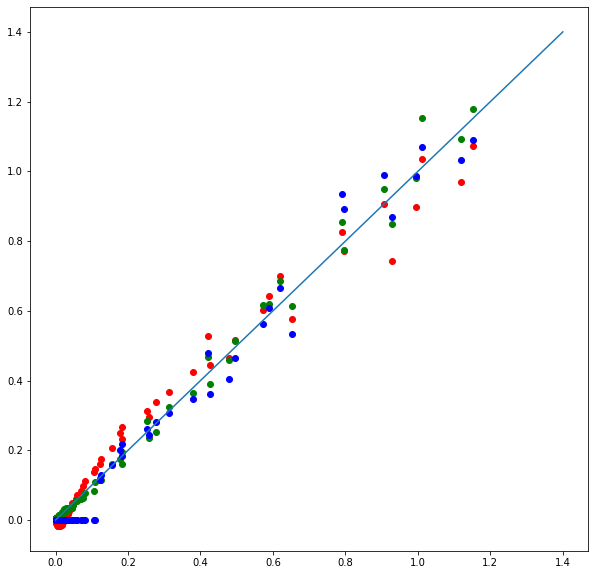

In [129]:
Y_predict = gp_sparse.predict(X_test)[0]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(Y_test[:,1], Y_predict, c='r', marker='o')
ax.scatter(Y_test[:,1], Y_predict_gp_full, c='g', marker='o')
ax.scatter(Y_test[:,1], Y_predict_mod, c='b', marker='o')
plt.plot([0,1.4], [0,1.4])
plt.show()

In [1]:
import hybrid_tree_gp

2020-11-24 23:59:57,261 - matplotlib.pyplot - DEBUG - Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2020-11-24 23:59:57,271 - matplotlib.pyplot - DEBUG - Loaded backend module://ipykernel.pylab.backend_inline version unknown.
warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy


In [6]:
m=hybrid_tree_gp.fit(X,Y[:,1])

2020-11-25 00:01:16,530 - GP - INFO - initializing Y
2020-11-25 00:01:16,532 - GP - INFO - initializing inference method
2020-11-25 00:01:16,532 - GP - INFO - adding kernel and likelihood as parameters
2020-11-25 00:01:16,581 - GP - INFO - initializing Y
2020-11-25 00:01:16,582 - GP - INFO - initializing inference method
2020-11-25 00:01:16,583 - GP - INFO - adding kernel and likelihood as parameters
2020-11-25 00:01:16,697 - GP - INFO - initializing Y
2020-11-25 00:01:16,698 - GP - INFO - initializing inference method
2020-11-25 00:01:16,699 - GP - INFO - adding kernel and likelihood as parameters
[[0.99993231 0.02019964 0.81491217]
 [0.99887352 0.4046604  0.25445553]
 [0.99715153 0.66581628 0.31543221]
 [0.99663409 0.19511409 0.86318298]
 [0.9943755  0.83724251 0.58569286]
 [0.99546993 0.22723437 0.01315606]]
[1.32930341 1.05442713 0.98191332 1.10314881 0.87371742 1.10178064]
[[0.98501282 0.76332139 0.22159453]
 [0.9933895  0.66421116 0.48907104]
 [0.98989193 0.94580291 0.26352665]
 

In [9]:
m.predict(X_test=X)

array([0.00124247, 0.00124247, 0.00124247, 0.00124247, 0.00124247,
       0.00124247, 0.58805326, 0.00124247, 0.00124247, 0.00124247,
       0.58804985, 0.00124247, 0.00124247, 0.00124247, 0.00124247,
       0.00124247, 0.00124247, 0.00124247, 0.00124247, 0.00124247,
       0.00124247, 0.00124247, 0.00124247, 0.00124247, 0.00124247,
       0.00124247, 0.00124247, 0.00124247, 0.00124247, 0.00124247,
       0.00124247, 0.00124247, 0.00124247, 0.00124247, 0.00124247,
       0.00124247, 0.00124247, 0.00124247, 0.00124247, 0.00124247,
       0.00124247, 0.00124247, 0.00124247, 0.00124247, 0.00124247,
       0.00124247, 0.00124247, 0.00124247, 0.00124247, 0.00124247,
       0.00124247, 0.00124247, 0.00124247, 0.00124247, 0.00124247,
       0.00124247, 0.00124247, 0.00124247, 0.00124247, 0.00124247,
       0.00124247, 0.00124247, 0.00124247, 0.00124247, 0.00124247,
       0.00124247, 0.00124247, 0.00124247, 0.00124247, 0.00124247,
       0.00124247, 0.00124247, 0.00124247, 0.00124247, 0.00124